In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from mlxtend.preprocessing import shuffle_arrays_unison
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
import time

In [3]:
data = pd.read_csv("GESTOS_17-04-2018.csv")
labels_data = pd.read_csv("CLASES_17-04-2018.csv")

X = data.fillna(data.mean(), inplace=True)
X = data.values
y = labels_data.values

print(X.shape)
print(y.shape)

(17999, 14)
(17999, 1)


In [4]:
#from scipy.sparse import coo_matrix
#X_sparse = coo_matrix(X)

from sklearn.utils import shuffle
#X, X_sparse, y = shuffle(X, X_sparse,y, random_state=0)
#X_sparse = X_sparse.toarray()
#print(X_sparse.shape)
#X_sparse = X_sparse.astype(int)

X, y = shuffle_arrays_unison(arrays=[X, y], random_seed=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Logistic Regression with C = 1

In [5]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=1, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.271841756839093 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [6]:
print(clf.coef_)

[[  1.38941255e+00  -5.84921006e+00  -5.82414228e-01  -8.70558700e+00
   -1.03511169e+00  -2.02903884e+00   3.54913256e+00  -1.96292433e-03
   -8.40591626e-03   3.28786486e-03  -5.92898028e+00   2.85190148e-01
   -1.04426907e-01   5.00110526e-01]
 [ -3.35252798e+00   8.29845922e+00   1.48185388e+00  -5.08411929e+00
   -9.31309427e-01   1.62469875e+00  -3.56784449e+00  -1.37469448e-03
   -1.51777232e-02  -6.01524561e-03  -7.95751686e+00   6.26024400e-01
    1.55004687e-02  -1.47731646e-01]
 [  3.03105460e+00   3.56801682e+00  -2.08411989e+00  -2.01690236e+00
    6.15676680e-02   3.48839318e-01  -1.03346800e+00   5.21847273e-04
   -2.58102578e-03   7.33462199e-04   6.05931700e+00  -2.08436605e+00
   -7.45481340e-03  -2.70098792e-01]
 [  6.77235658e-01   3.88052369e-01  -3.51106304e-01   2.96395820e+00
   -4.80997239e+00   1.87761385e+00   2.56682401e+00   5.65167429e-03
    3.33705390e-03  -7.62916638e-03  -4.75848134e-01  -2.75899035e+00
   -1.45386999e-02  -2.19073022e-01]
 [  1.050858

(50, 10)
(50, 10)
(50,)
(17999, 14)


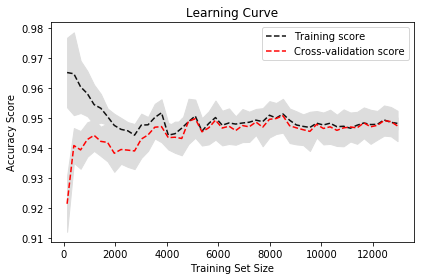

In [7]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [8]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.950277777778
0.950277777778
0.940302323707
0.238276029484


## Logistic Regression with C = 10

In [9]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=10, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.4029781393487042 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(50, 10)
(50, 10)
(50,)
(17999, 14)


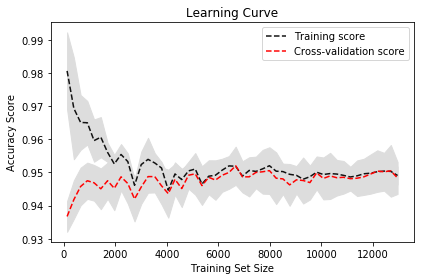

In [10]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [11]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.949444444444
0.949444444444
0.939301556574
0.231164994582


## Logistic Regression with C = 100

In [12]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=100, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.4558807475299602 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(50, 10)
(50, 10)
(50,)
(17999, 14)


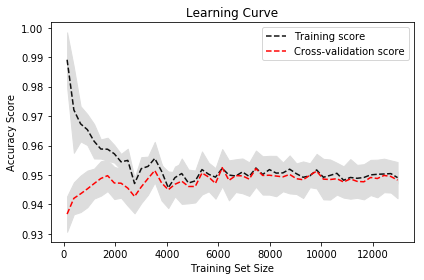

In [13]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [14]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.949722222222
0.949722222222
0.939633498628
0.228894767217


##  Logistic Regression with C = 0.1

In [15]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=0.1, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.4825163308740912 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(50, 10)
(50, 10)
(50,)
(17999, 14)


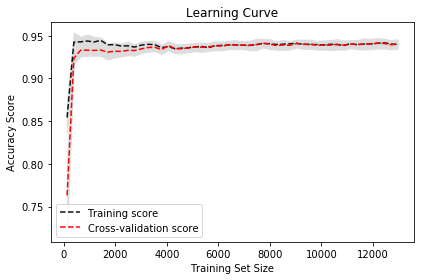

In [16]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.942222222222
0.942222222222
0.930629367105
0.267240621291


##  Logistic Regression with C = 0.01 

In [18]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=0.01, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.4583332944558265 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(50, 10)
(50, 10)
(50,)
(17999, 14)


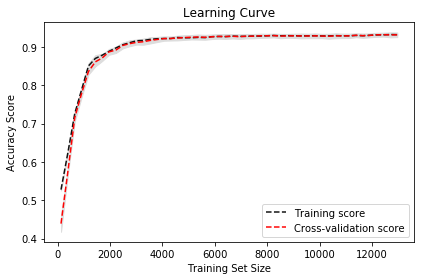

In [19]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [20]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.933888888889
0.933888888889
0.920630752082
0.418337344884


## Logistic Regression with C = 0.001

In [21]:
#C=1000,random_state=0,solver='lbfgs',multi_class='multinomial'
start_time = time.clock()
clf = LogisticRegression(C=0.001, solver = 'lbfgs').fit(X_train, np.ravel(y_train))
print("--- %s seconds ---" % (time.clock() - start_time))

C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarnin

--- 1.561330934748355 seconds ---


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(50, 10)
(50, 10)
(50,)
(17999, 14)


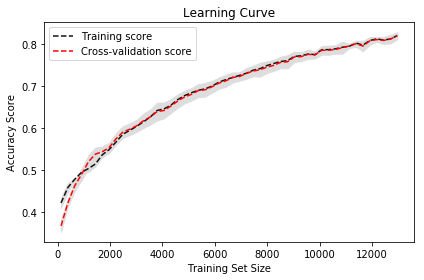

In [22]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(clf, 
                                                        X_train, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
                                                        #train_sizes=np.linspace(.1, 1.0, 50))
print(test_scores.shape)
print(train_scores.shape)
print(train_sizes.shape)
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
print(X.shape)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean,'--',color="#ff0202", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [23]:
predicted_labels = clf.predict(X_test)
predicted_probas = clf.predict_proba(X_test)
accuracy = accuracy_score(y_test,predicted_labels)
print(accuracy)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted_labels,average='micro')
print(f1)

from sklearn.metrics import cohen_kappa_score
cohen = cohen_kappa_score(y_test, predicted_labels)
print(cohen)

from sklearn.metrics import log_loss
loss = log_loss(y_test, predicted_probas)
print(loss)

0.833611111111
0.833611111111
0.800062288145
0.914443238244


In [24]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

data = pd.read_csv("GESTOS_17-04-2018.csv")
labels_data = pd.read_csv("CLASES_17-04-2018.csv")

X = data.fillna(data.mean(), inplace=True)
X = data.values
y = labels_data.values
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(C=1, solver = 'lbfgs'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Automatically created module for IPython interactive environment


C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\RobertoAlejandro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase t

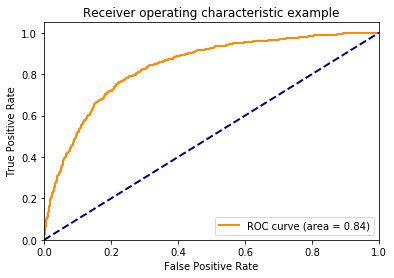

In [25]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

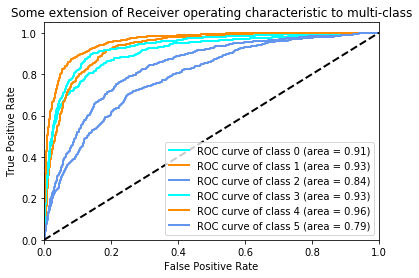

In [26]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()